### Задание

#### 1. Получите данные и загрузите их в рабочую среду.

In [2]:
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('adult.csv', na_values=['?'])

#### 2. Проведите первичный анализ.

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### 3. Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками*

In [6]:
# Рассчитаем количество пропусков для каждого столбца
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
# Удалим строки, содержащие пропуски
data = df.dropna()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


В качестве альтернативных способов работы с пропусками, применимы:
- заполнение константой, которая заведомо не может попадать в реальные значения;
- заполнение средним/модой/медианой;
- заполнение следующим/предыдущим значением.

#### 4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной.

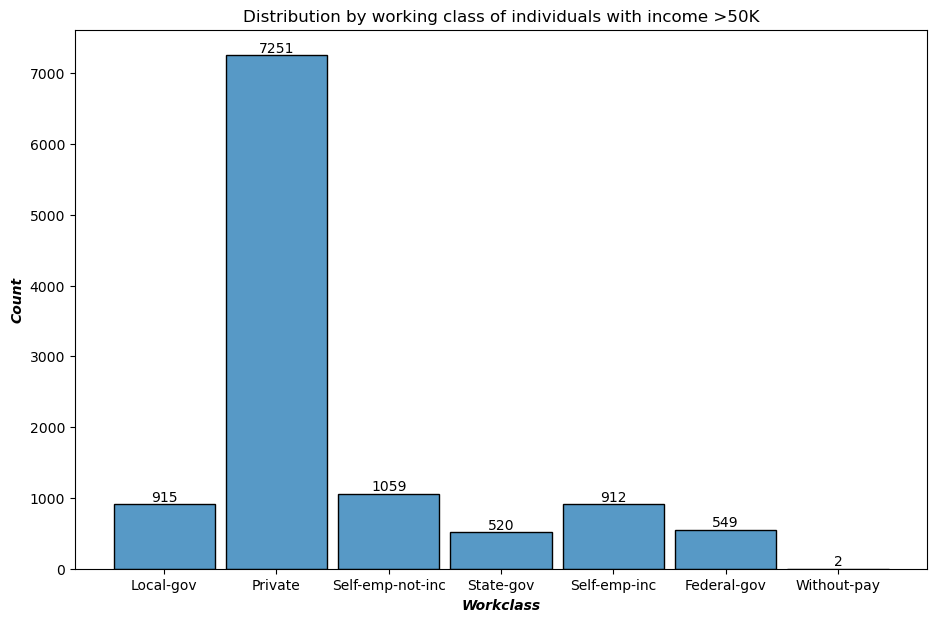

In [50]:
# Визуализируем распределение по рабочим классам физических лиц с уровнем дохода >50К
workclasses_income_over_fifty = data[['workclass']][data['income'] == '>50K']

plt.figure(figsize=(11, 7))
ax = sns.histplot(workclasses_income_over_fifty['workclass'], shrink=0.9)
plt.title('Distribution by working class of individuals with income >50K')
plt.xlabel('Workclass', weight='bold', style='italic')
plt.ylabel('Count', weight='bold', style='italic')

for p in ax.patches:
    height = p.get_height()
    plt.annotate(f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

plt.show()

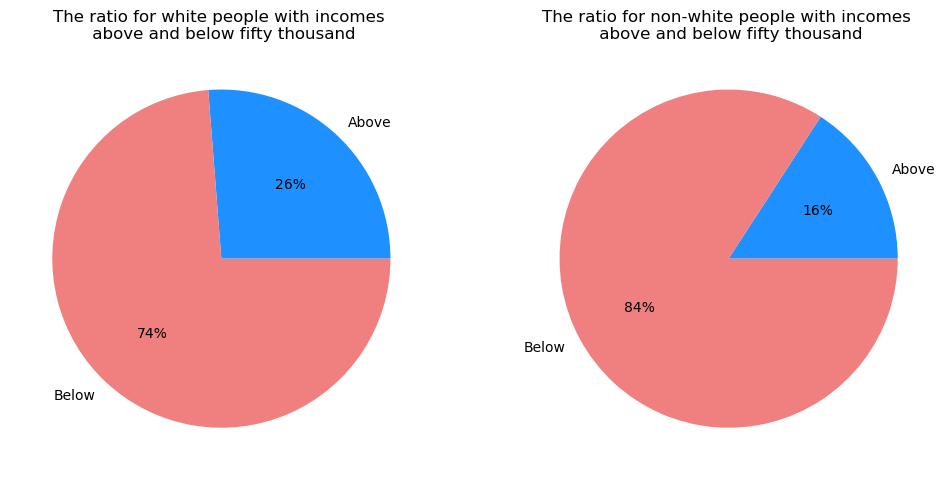

In [18]:
# Визуализируем разницу в соотношении уровня дохода для людей белой расы и людей других рас
white_races_income = data[['income']][data['race'] == 'White']
non_white_races_income = data[['income']][data['race'] != 'White']

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie([len(white_races_income[white_races_income['income'] == '>50K']), 
        len(white_races_income[white_races_income['income'] == '<=50K'])], 
        labels=['Above', 'Below'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('The ratio for white people with incomes \n above and below fifty thousand')

plt.subplot(122)
plt.pie([len(non_white_races_income[non_white_races_income['income'] == '>50K']), 
        len(non_white_races_income[non_white_races_income['income'] == '<=50K'])], 
        labels=['Above', 'Below'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('The ratio for non-white people with incomes \n above and below fifty thousand')
plt.show()

#### 5. Преобразуйте категориальные признаки.

In [67]:
indications = data[['workclass', 'education', 'relationship', 'race', 'gender']]
indications.head()

,workclass,education,relationship,race,gender
0,Private,11th,Own-child,Black,Male
1,Private,HS-grad,Husband,White,Male
2,Local-gov,Assoc-acdm,Husband,White,Male
3,Private,Some-college,Husband,Black,Male
5,Private,10th,Not-in-family,White,Male


In [68]:
X = pd.get_dummies(indications, columns=['workclass', 'education', 'relationship', 'race', 'gender'])
X.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
le.fit(data['income'])

LabelEncoder()

In [69]:
y = pd.Series(data=le.transform(data['income']))

#### 6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [58]:
logreg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
svm_model = make_pipeline(StandardScaler(), SVC())

In [71]:
logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

#### 8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [72]:
logreg_model.score(X_test, y_test)

0.8238805970149253

In [73]:
svm_model.score(X_test, y_test)

0.8257600884466556

In [39]:
from sklearn.metrics import accuracy_score

In [74]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred_logreg)

0.8238805970149253

In [76]:
accuracy_score(y_test, y_pred_svm)

0.8257600884466556

Видим, что модели логистической регрессии и метода опорных векторов в задаче бинарной классификации с представленными данными и выбранными признаками выполняют предсказания с соизмеримой точностью.

In [148]:
# Визуализируем соотношение для людей белой расы с доходом выше и ниже пятидесяти тысяч
white_races_income = data[['income']][data['race'] == 'White']

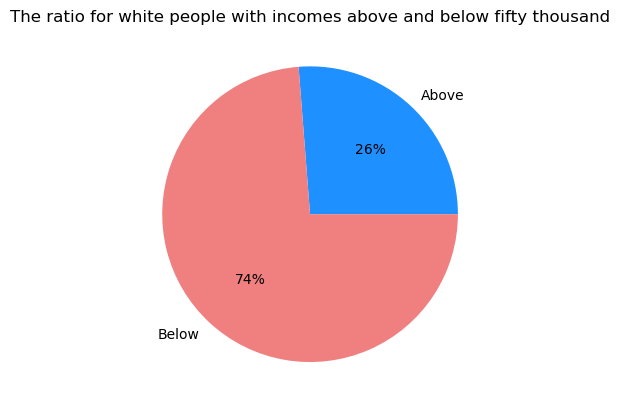

In [154]:
plt.pie([len(white_races_income[white_races_income['income'] == '>50K']), 
        len(white_races_income[white_races_income['income'] == '<=50K'])], 
        labels=['Above', 'Below'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('The ratio for white people with incomes above and below fifty thousand')
plt.show()

In [205]:
# Визуализируем соотношение для людей не белой расы с доходом выше и ниже пятидесяти тысяч
non_white_races_income = data[['income']][data['race'] != 'White']

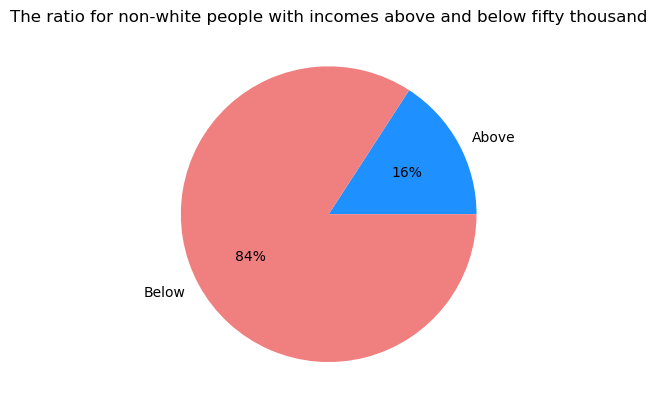

In [206]:
plt.pie([len(non_white_races_income[non_white_races_income['income'] == '>50K']), 
        len(non_white_races_income[non_white_races_income['income'] == '<=50K'])], 
        labels=['Above', 'Below'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('The ratio for non-white people with incomes above and below fifty thousand')
plt.show()

In [ ]:
# plt.figure(figsize=(10, 7))
# sns.histplot(workclasses_income_over_fifty['workclass'], shrink=0.9)

# plt.plot(avg_age['film_release_year'], avg_age['actress_age'])
# plt.xticks(range(1960, 2022, 5))
# plt.yticks(range(20, 45, 5))
# plt.grid(linestyle='--')

# plt.title('Distribution by working class of individuals with income >50K')
# plt.xlabel('Workclass', weight='bold', style='italic', size=12)
# plt.ylabel('Count', weight='bold', style='italic', size=12)
# plt.xticks(rotation=30)

# plt.show()